## Assignment 1

### Question 3

3. With normalized input data from question 1, find best "K" and "p" (norm; the metric you can choose) to see the same behaviour for training and validation sets. Have a discussion.

### Import the necessary Python packages including:
* numpy for the array capabilities
* pandas for data visualization and manipulation
* matplotlib for plotting
* scikit-learn for its data processing, regressors, feature extraction
* seaborn just to have a nice plotting surface

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Use seaborn to set the plotting style
sns.set_style('whitegrid')

print('Packages imported.')

Packages imported.


### Load the data and display the first 5 rows. Additionally, look at the column information to see if cleaning is necessary

In [2]:
# Load the melanoma data using pandas
skin_data = pd.read_csv('skin_cancer.csv')

# Display the first 5 rows of data
skin_data.head(n=5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [3]:
# Display the info about each of the columns to see if cleaning is necessary
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


### Look at the histograms of the data before normalization

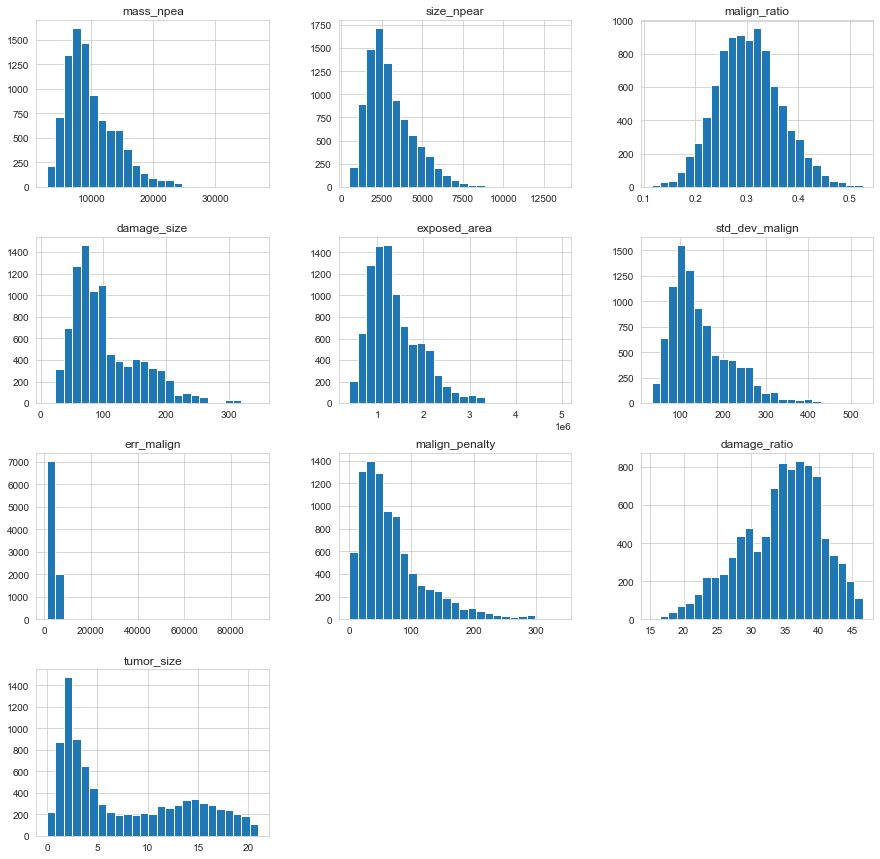

In [4]:
# All data histograms so that we can look at the distributions before and after normalization

skin_data.hist(bins=25, figsize=(15, 15))
plt.show()

### Set the input and target data
Target data is 'tumor_size' or the size of the skin cancer tumor

Also double check the size of the input and target arrays are the same

In [5]:
# Set the input and target data
input_skin = skin_data[['mass_npea', 'size_npear', 'malign_ratio', 'damage_size', 'exposed_area', 'std_dev_malign', 
                        'err_malign', 'malign_penalty', 'damage_ratio']].values
target_skin = skin_data['tumor_size'].values

# Print the shapes of the data to make sure the size is the same (number of rows)
print(f'Input shape: {np.shape(input_skin)}')
print(f'Target shape: {np.shape(target_skin)}')

Input shape: (9146, 9)
Target shape: (9146,)


### Separate the input and target randomly into a training and validation set
### Validation test is 25% of the 9,146 rows

In [6]:
# Training input, validation input, training target, validation target
# Separately
input_tr, input_va, target_tr, target_va = train_test_split(input_skin, target_skin, test_size=0.25)

# Print the new sizes of the various training and validation sets
print(f'Training set shapes: {np.shape(input_tr)}, {np.shape(target_tr)}')
print(f'Validation set shapes: {np.shape(input_va)}, {np.shape(target_va)}')

Training set shapes: (6859, 9), (6859,)
Validation set shapes: (2287, 9), (2287,)


### Check that the shapes of the distributions of the training and validation sets are roughly the same


Text(0.5, 1.0, 'Validation set')

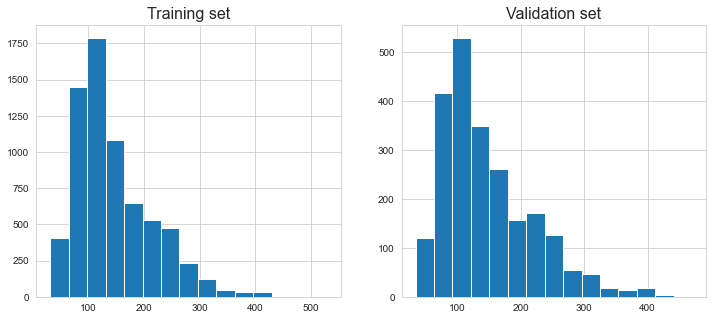

In [7]:
# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

## Now normalize the data 

In [8]:
# Apply a standard normalization to the input data
stnd_scaler = StandardScaler().fit(input_tr)
input_tr_norm = stnd_scaler.transform(input_tr)  # Normalize training data
input_va_norm = stnd_scaler.transform(input_va)  # Normalize the validation data

### Look at the histograms of the data after normalization

Text(0.5, 1.0, 'Validation set')

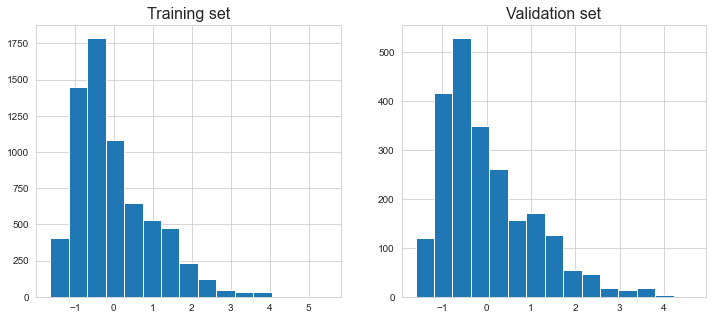

In [9]:
# Examine the input data after normalization for both the training and validation sets

# The column of the input data to examine
col_num = 5

# The figure and subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(input_tr_norm[:, col_num], bins=15)
ax[0].set_title('Training set', fontsize=16)

ax[1].hist(input_va_norm[:, col_num], bins=15)
ax[1].set_title('Validation set', fontsize=16)

### Find the RMSE for the various k- and p-values.

$RMSE = \sqrt{\frac{\sum_{i=1}^{N}(Predicted_i - Actual_i)^2}{N}}$

Go through a double for loop, to calculate the RMSE for the training and validation sets at each k- and p-value pair for the KNN regressor.

k = 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50

p = 1, 2

In [17]:
# Define the k- and p-values to iterate through
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50]
p_vals = [1, 2]

# Set up the arrays to hold the various RMSE values
rmse_tr = np.zeros((2, len(k_vals)))  # Training RMSE, with the first index corresponding to the p-value
rmse_va = np.zeros((2, len(k_vals)))  # Validation RMSE, with the first index corresponding to the p-value

# The number of items in the training and validation sets
N_tr = np.shape(input_tr_norm)[0]
N_va = np.shape(input_va_norm)[0]

for p_idx, p in enumerate(p_vals):
    for k_idx, k in enumerate(k_vals):
        # The KNN regressor, with n_neighbors = k and p = p
        reg_temp = KNeighborsRegressor(n_neighbors=k, p=p)

        # Fit the model with the normalized training set
        reg_temp.fit(input_tr_norm, target_tr) 

        # Use the regressor to prediction the results for training and validation sets
        target_tr_temp = reg_temp.predict(input_tr_norm)  
        target_va_temp = reg_temp.predict(input_va_norm)
        
        # Set the RMSE values
        rmse_tr[p_idx, k_idx] = np.sqrt(np.sum(np.power(target_tr_temp - target_tr, 2)) / N_tr)
        rmse_va[p_idx, k_idx] = np.sqrt(np.sum(np.power(target_va_temp - target_va, 2)) / N_va)

print('Finished running.')

Finished running.


### Now we'll plot the RMSE vs. the number of neighbors used (k) for both p = 1 and p = 2. 

The k-value that gives the lowest RMSE in the validation set is: 7


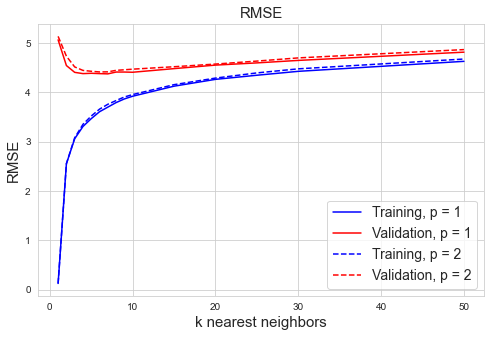

In [18]:
# Plot the RMSE values for both the training and validation sets for p = 1 and p = 2
fig = plt.figure(figsize=(8, 5))

plt.plot(k_vals, rmse_tr[0], color='blue')
plt.plot(k_vals, rmse_va[0], color='red')
plt.plot(k_vals, rmse_tr[1], color='blue', ls='--')
plt.plot(k_vals, rmse_va[1], color='red', ls='--')
plt.xlabel('k nearest neighbors', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.title('RMSE', fontsize=15)
plt.legend(['Training, p = 1', 'Validation, p = 1', 'Training, p = 2', 'Validation, p = 2'], fontsize=14)

plt.plot()

# Print the k that has the lowest RMSE for p = 1
print(f'The k-value that gives the lowest RMSE in the validation set is: {k_vals[np.squeeze(np.argmin(rmse_va[0]))]}')

### Based on the above plot, we obtain the lowest RMSE value in the validation set for p = 1 and k = 7. Using this data, we obtain the following results in terms of behavior from the training and validation sets. Below, I've run the KNN regressor for k = 7, and then k = 50 in order to see the differences in behavior.

In [19]:
# The KNN regressor, with k = 7 and p = 1
reg = KNeighborsRegressor(n_neighbors=7, p=1)

# Fit the model with the normalized training set
reg.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_7 = reg.predict(input_tr_norm)  
target_va_7 = reg.predict(input_va_norm)


# The KNN regressor, with k = 50 and p = 1
reg = KNeighborsRegressor(n_neighbors=50, p=1)

# Fit the model with the normalized training set
reg.fit(input_tr_norm, target_tr) 

# Use the regressor to prediction the results for training and validation sets
target_tr_50 = reg.predict(input_tr_norm)  
target_va_50 = reg.predict(input_va_norm)


### First we'll look at the distribution of the difference between real and predicted values for both the training and validation sets for k = 7 and k = 50.

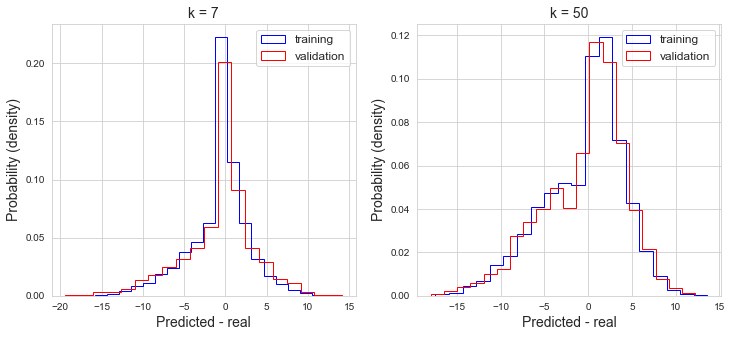

In [20]:
# Look at the distribution of the predicted - real for k = 7 and k = 50

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].hist(target_tr_7 - target_tr, 20, color='b', histtype='step', density=True, label='training')
ax[0].hist(target_va_7 - target_va, 20, color='r', histtype='step', density=True, label='validation')
ax[0].set_xlabel('Predicted - real', fontsize=14)
ax[0].set_ylabel('Probability (density)', fontsize=14)
ax[0].set_title('k = 7', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].hist(target_tr_50 - target_tr, 20, color='b', histtype='step', density=True, label='training')
ax[1].hist(target_va_50 - target_va, 20, color='r', histtype='step', density=True, label='validation')
ax[1].set_xlabel('Predicted - real', fontsize=14)
ax[1].set_ylabel('Probability (density)', fontsize=14)
ax[1].set_title('k = 50', fontsize=14)
ax[1].legend(fontsize=12)

### For the distribution of the difference between the predicted and the real values for training and validation sets, we see that we get good agreement between the two sets for both k = 7 and k = 50, however we see a better Gaussian distribution with k = 7. With k = 50, we see a second peak beginning to develop to the left of the main peak, which continues to get larger the more neighbors are used.

### Now we'll look at the same thing for the systematic error.

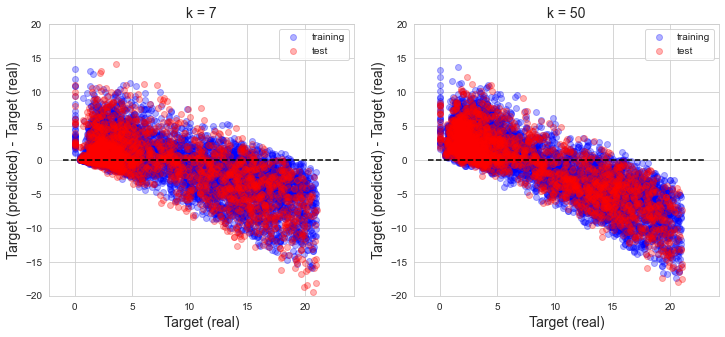

In [21]:
# Look at the systematic errors for k = 7 and k = 50

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].scatter(target_tr, target_tr_7 - target_tr, label='training', color='b', alpha=.3)
ax[0].scatter(target_va, target_va_7 - target_va, label='test', color='r', alpha=.3)
ax[0].set_xlabel('Target (real)', fontsize=14)
ax[0].set_ylabel('Target (predicted) - Target (real)', fontsize=14)
ax[0].set_title('k = 7', fontsize=14)
ax[0].plot([-1, 23], [0, 0], '--k')
ax[0].set_ylim([-20, 20])
ax[0].legend()

ax[1].scatter(target_tr, target_tr_50 - target_tr, label='training', color='b', alpha=.3)
ax[1].scatter(target_va, target_va_50 - target_va, label='test', color='r', alpha=.3)
ax[1].set_xlabel('Target (real)', fontsize=14)
ax[1].set_ylabel('Target (predicted) - Target (real)', fontsize=14)
ax[1].set_title('k = 50', fontsize=14)
ax[1].plot([-1, 23], [0, 0], '--k')
ax[1].set_ylim([-20, 20])
ax[1].legend()


### The systematic eror doesn't give us as much, we see a slightly higher systematic error with k = 7, although it is not largely different than the error with k = 50.

### Now just to double check we'll try the same thing with the GridSearch function from scikit-learn.

In [22]:
# Import GridSearch
from sklearn.model_selection import GridSearchCV

# Set the parameters to go over to be the same as we looked at above
param_grid = [{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 50], 'p': [1, 2]}]

# Again set up the regressor
reg = KNeighborsRegressor()

# Perform the GridSearch
grid_search = GridSearchCV(reg, param_grid, cv=5)

# And fit
grid_search.fit(input_tr_norm, target_tr)

# Print the best parameters
print(f'The best parameters from GridSearchCV are: {grid_search.best_params_}')

The best parameters from GridSearchCV are: {'n_neighbors': 7, 'p': 1}


### And we see that we get similar results for the best fitting parameters of k = 5 and p = 1, whereas before we had k = 7 from the RMSE data.

## We still see the model is essentially spitting out the average of the actual tumor values, as discussed in previous questions. This means that we're getting the best performance out of the model that we can with the original features. We still a high peak in the Gaussian distribution using k = 7 which could indicate some overfitting since we are using fairly few neighbors compared to the size of our data set (9,146 patients). So doing some feature extraction may help our model to perform better.